# **GARCH**

**GARCH** - GENERALIZED AUTOREGRESSIVE CONDITIONAL HETEROSKEDASTICITY

**GARCH** is a statistical modeling technique through which we can predict the volatility of returns of financial assets.

In [1]:
import pandas_datareader.data as web
from  datetime import datetime,timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np
import yfinance as yf
from datetime import datetime ,date
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# downloading data
data = yf.download("ADANIENT.NS",start = datetime(2018,1,1),end = datetime(2023,2,1))["Adj Close"]
data

[*********************100%***********************]  1 of 1 completed


Date
2018-01-01      89.171822
2018-01-02      88.017227
2018-01-03      94.622543
2018-01-04      98.435387
2018-01-05     103.725006
                 ...     
2023-01-24    3442.000000
2023-01-25    3388.949951
2023-01-27    2761.449951
2023-01-30    2892.850098
2023-01-31    2973.899902
Name: Adj Close, Length: 1257, dtype: float64

In [3]:
# calculate returns of the data
Returns = data.pct_change().dropna()
Returns

Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2023-01-24    0.001644
2023-01-25   -0.015413
2023-01-27   -0.185161
2023-01-30    0.047584
2023-01-31    0.028017
Name: Adj Close, Length: 1256, dtype: float64

Text(0.5, 1.0, 'Adani Returns')

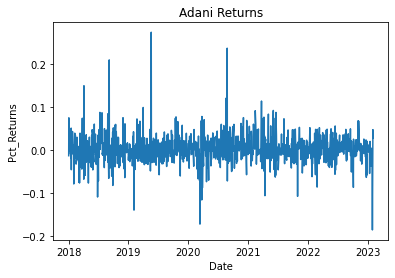

In [4]:
# plotting returns
plt.plot(Returns.index,Returns)
plt.xlabel("Date")
plt.ylabel("Pct_Returns")
plt.title("Adani Returns")

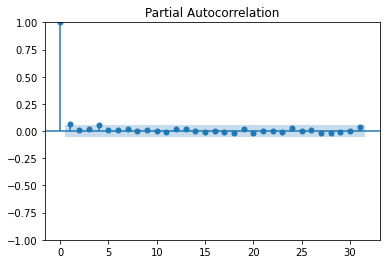

In [5]:
plot_pacf(Returns**2)
plt.show()

As we can see from the chart that lags are significantly close to zero but lag1 is near to  signifacant line as compared to other lags.So,we will fit GARCH(1,1) model.

**GARCH(1,1)**

In [6]:
# dividing the data into train and split
size = int(len(Returns)*0.90)
train_return = Returns.iloc[:size]
test_return = Returns.iloc[size:]
len(test_return)

126

In [7]:
# fitting the data into GARCH-model

rolling_predictions = []
test_size = len(test_return)
for i in range(test_size):
    print(i)
    train = Returns[:-(test_size  - i)]
    print(train)
    model = arch_model(train,p=1,q=1)
    model_fit = model.fit(disp="off")
    pred=model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))


0
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2022-07-22    0.001563
2022-07-25    0.020485
2022-07-26    0.003568
2022-07-27   -0.004297
2022-07-28    0.000667
Name: Adj Close, Length: 1130, dtype: float64
1
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2022-07-25    0.020485
2022-07-26    0.003568
2022-07-27   -0.004297
2022-07-28    0.000667
2022-07-29    0.007371
Name: Adj Close, Length: 1131, dtype: float64
2
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2022-07-26    0.003568
2022-07-27   -0.004297
2022-07-28    0.000667
2022-07-29    0.007371
2022-08-01    0.035400
Name: Adj Close, Length: 1132, dtype: float64
3
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-0

27
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2022-09-02    0.037903
2022-09-05   -0.002756
2022-09-06    0.026669
2022-09-07    0.011045
2022-09-08   -0.003152
Name: Adj Close, Length: 1157, dtype: float64
28
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2022-09-05   -0.002756
2022-09-06    0.026669
2022-09-07    0.011045
2022-09-08   -0.003152
2022-09-09   -0.003350
Name: Adj Close, Length: 1158, dtype: float64
29
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2022-09-06    0.026669
2022-09-07    0.011045
2022-09-08   -0.003152
2022-09-09   -0.003350
2022-09-12    0.003651
Name: Adj Close, Length: 1159, dtype: float64
30
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
20

56
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2022-10-14   -0.007468
2022-10-17    0.000966
2022-10-18    0.022318
2022-10-19   -0.002147
2022-10-20    0.024365
Name: Adj Close, Length: 1186, dtype: float64
57
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2022-10-17    0.000966
2022-10-18    0.022318
2022-10-19   -0.002147
2022-10-20    0.024365
2022-10-21   -0.013464
Name: Adj Close, Length: 1187, dtype: float64
58
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2022-10-18    0.022318
2022-10-19   -0.002147
2022-10-20    0.024365
2022-10-21   -0.013464
2022-10-24   -0.000634
Name: Adj Close, Length: 1188, dtype: float64
59
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
20

88
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2022-12-01   -0.000715
2022-12-02    0.001890
2022-12-05    0.002014
2022-12-06    0.025799
2022-12-07   -0.008061
Name: Adj Close, Length: 1218, dtype: float64
89
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2022-12-02    0.001890
2022-12-05    0.002014
2022-12-06    0.025799
2022-12-07   -0.008061
2022-12-08    0.006426
Name: Adj Close, Length: 1219, dtype: float64
90
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2022-12-05    0.002014
2022-12-06    0.025799
2022-12-07   -0.008061
2022-12-08    0.006426
2022-12-09   -0.007006
Name: Adj Close, Length: 1220, dtype: float64
91
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
20

119
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2023-01-13    0.020276
2023-01-16   -0.027236
2023-01-17    0.005401
2023-01-18   -0.011719
2023-01-19   -0.037020
Name: Adj Close, Length: 1249, dtype: float64
120
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2023-01-16   -0.027236
2023-01-17    0.005401
2023-01-18   -0.011719
2023-01-19   -0.037020
2023-01-20   -0.002137
Name: Adj Close, Length: 1250, dtype: float64
121
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.040295
2018-01-05    0.053737
2018-01-08    0.017085
                ...   
2023-01-17    0.005401
2023-01-18   -0.011719
2023-01-19   -0.037020
2023-01-20   -0.002137
2023-01-23   -0.005729
Name: Adj Close, Length: 1251, dtype: float64
122
Date
2018-01-02   -0.012948
2018-01-03    0.075046
2018-01-04    0.04029

In [8]:
rolling_predictions = pd.Series(rolling_predictions, index=Returns.index[-len(test_return):])

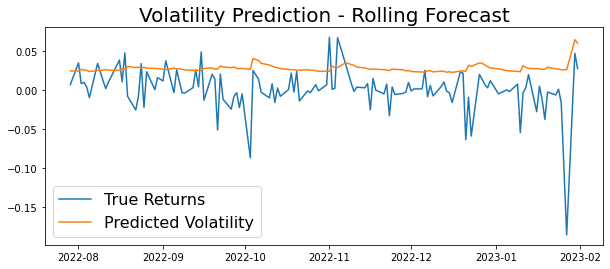

In [9]:
# plotting the test return vs volatility(standard deviation of prediction)
plt.figure(figsize=(10,4))
true, = plt.plot(Returns[-len(test_return):])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

**Predicting the volatility for next 12 days**

In [10]:
train_returns4 = Returns
model_4 = arch_model(train_returns4, p=1, q=1)
model_fit4 = model_4.fit(disp="off")

In [11]:
pred_4 = model_fit4.forecast(horizon=12)
future_dates = [Returns.index[-1] + timedelta(days=i) for i in range(1,13)]
pred_5 = pd.Series(np.sqrt(pred_4.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 12 Days')

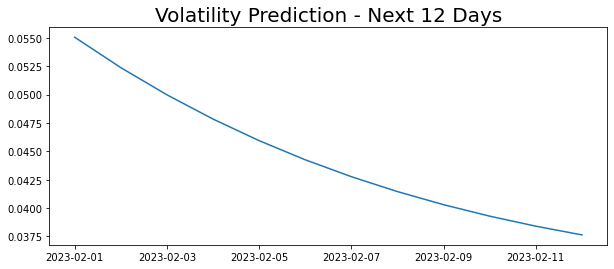

In [12]:
plt.figure(figsize=(10,4))
plt.plot(pred_5)
plt.title('Volatility Prediction - Next 12 Days', fontsize=20)

**We are expecting Volatility will reduce in next 12 Days**